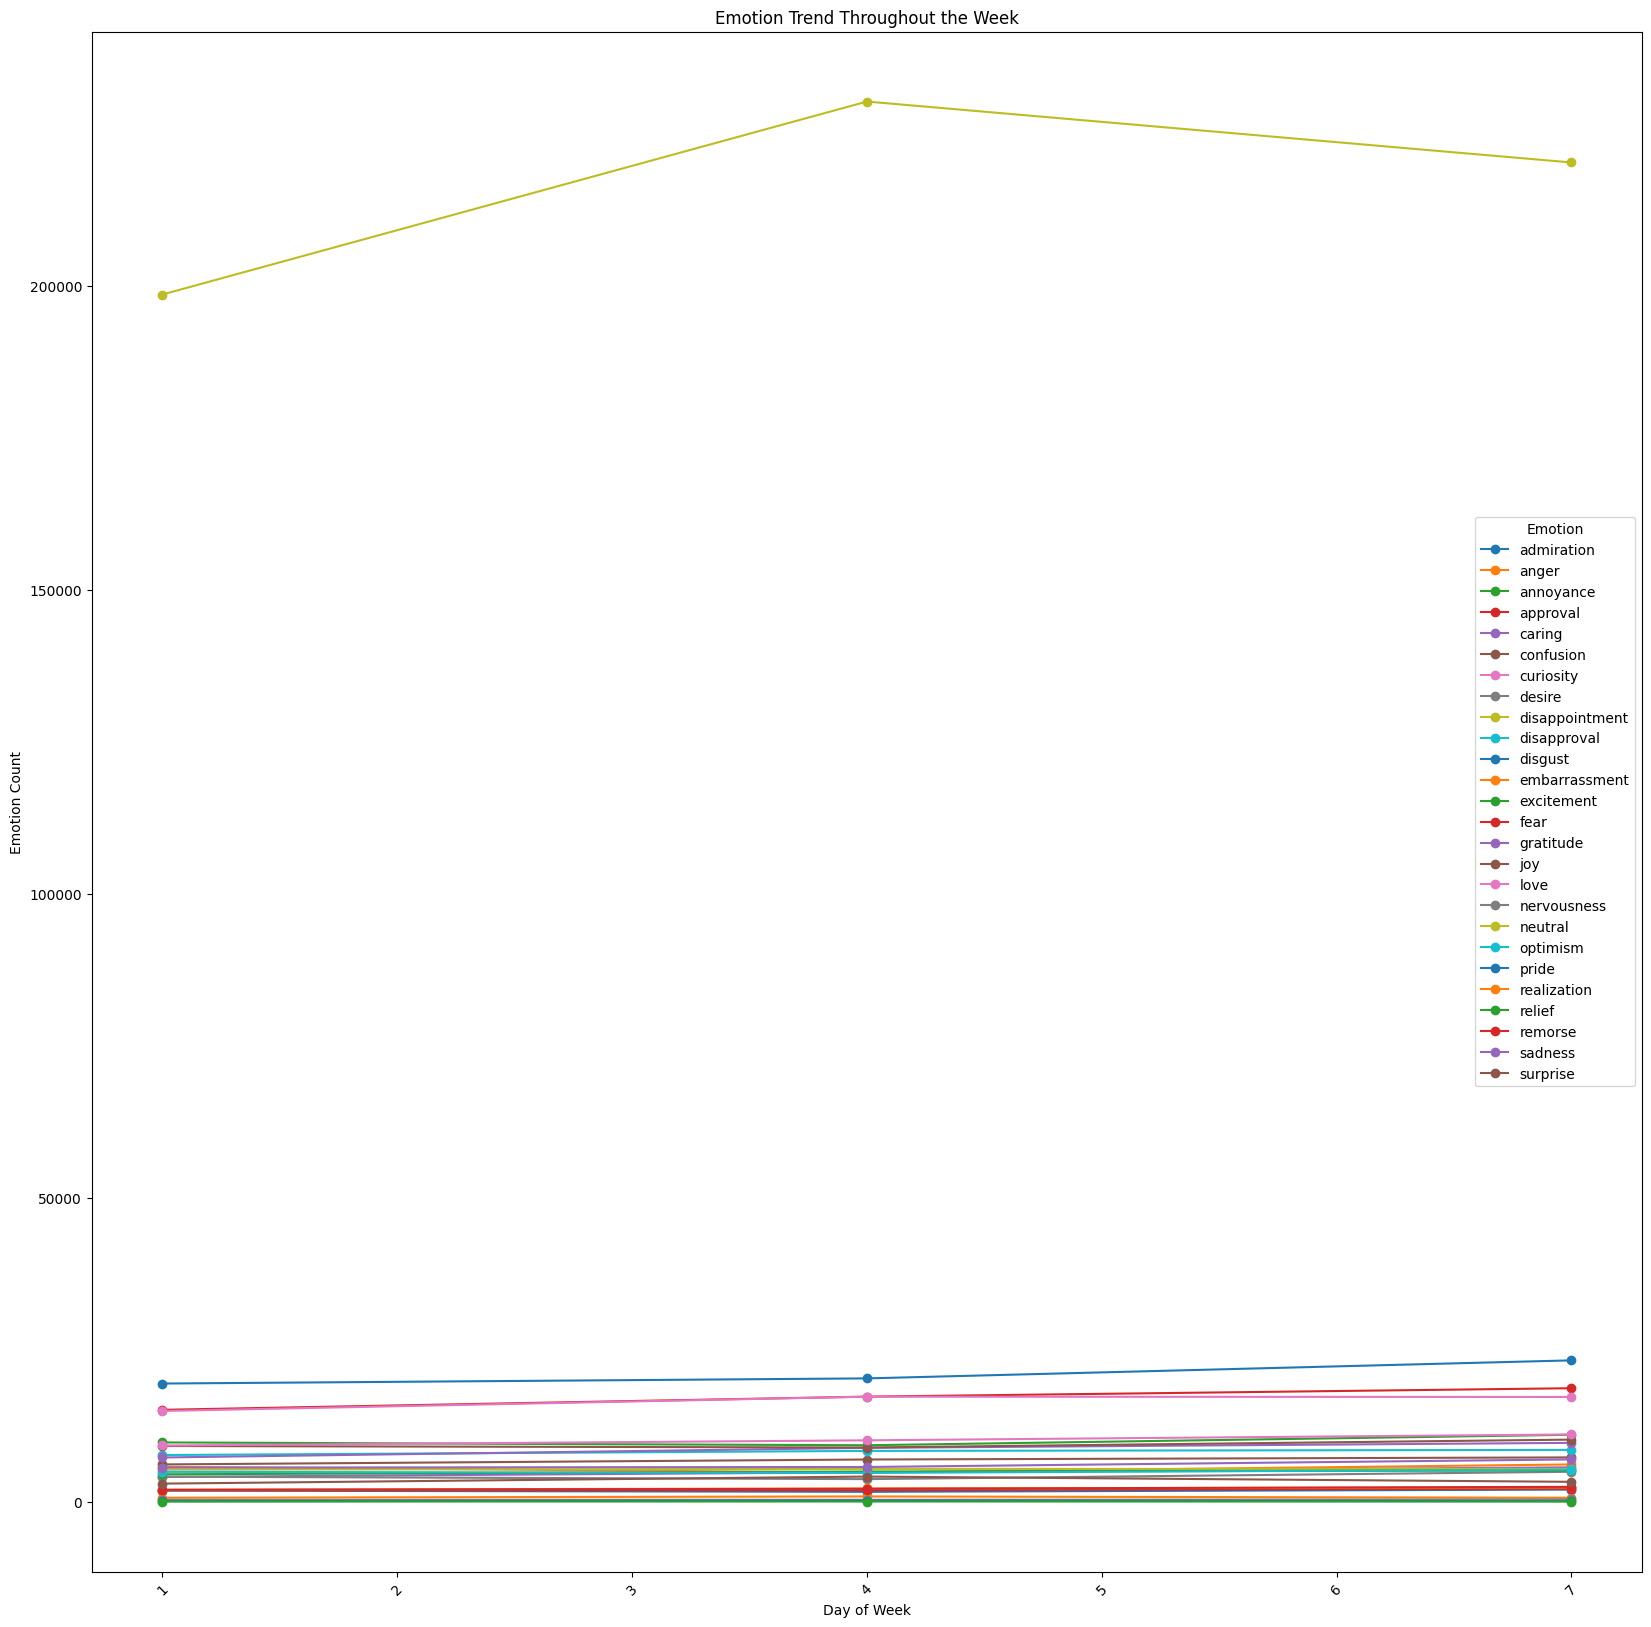

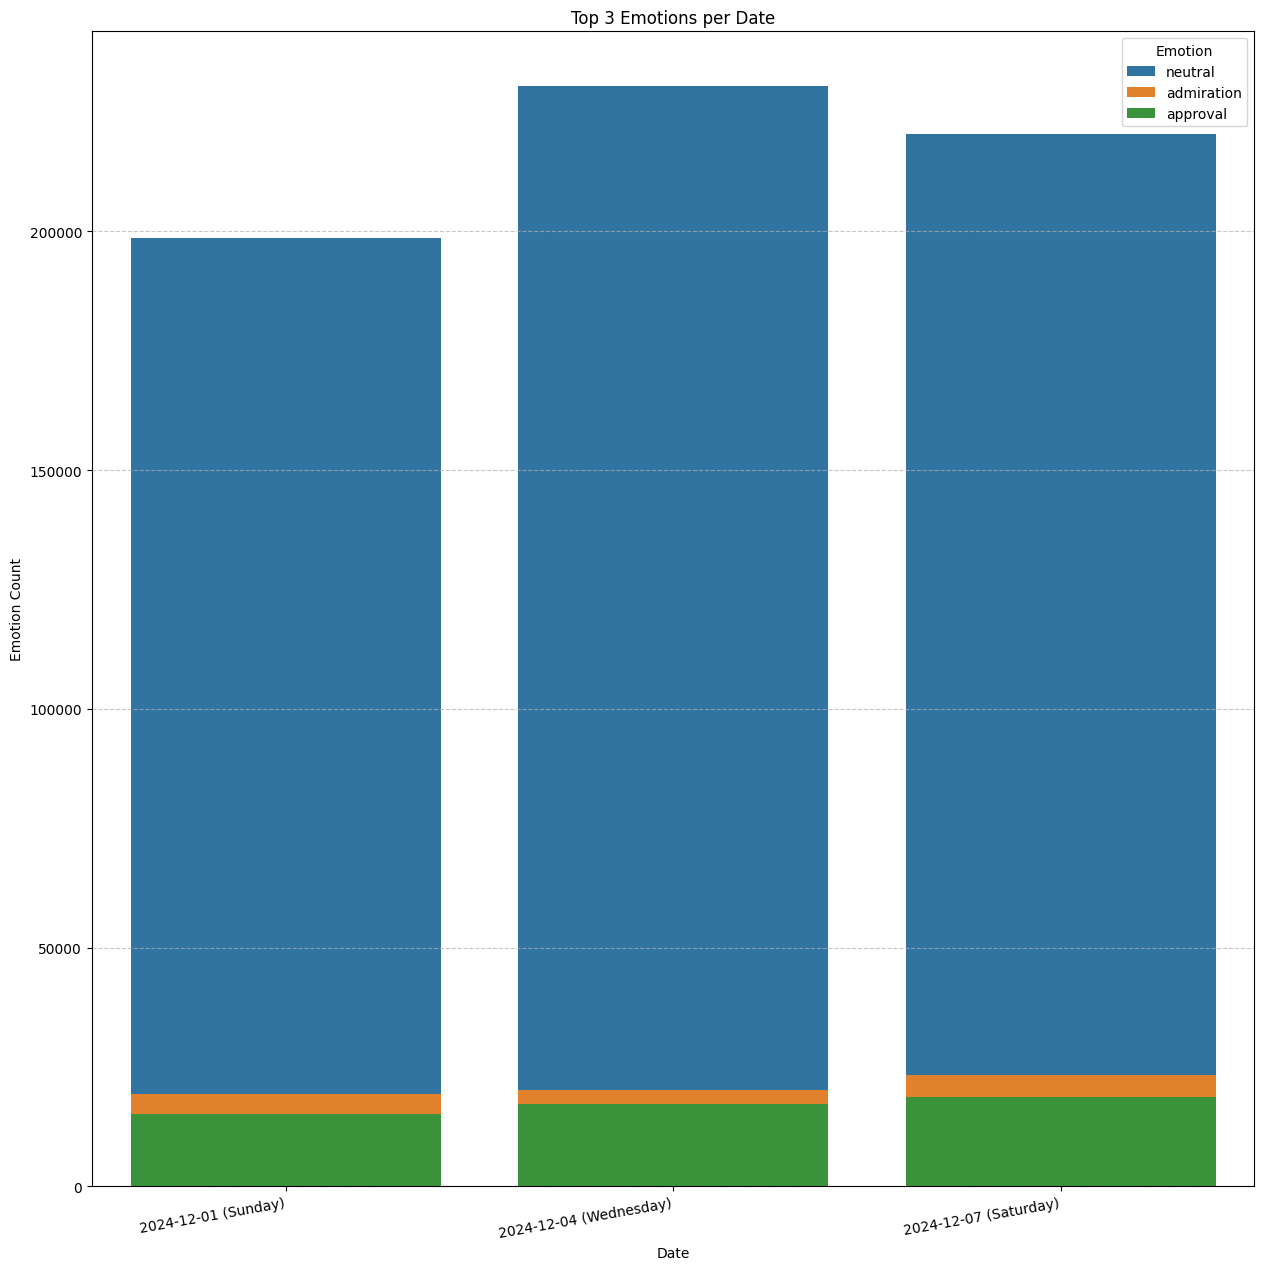

OUTLIER EMOTION SUMMARY
On 2024-12-01, the outlier emotion would be neutral with a count of 198609. This is on a Sunday
On 2024-12-04, the outlier emotion would be neutral with a count of 230359. This is on a Wednesday
On 2024-12-07, the outlier emotion would be neutral with a count of 220334. This is on a Saturday


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates


# Define S3 bucket path
s3_csv_path_timeseries = "../spark_analysis/output/time_series.csv"

# Read CSV from S3
df = pd.read_csv(s3_csv_path_timeseries)

# Plot the trend
df.set_index('day_of_week').plot(kind='line', marker='o', figsize=(20, 20))

# Add titles and labels
plt.title("Emotion Trend Throughout the Week")
plt.xlabel("Day of Week")
plt.ylabel("Emotion Count")
plt.xticks(rotation=45)
plt.legend(title="Emotion")

plt.show()

######## Top 3 of the Day ########


# Define S3 bucket path
s3_csv_path_top3 = "../spark_analysis/output/top_emotions.csv"

# Read CSV from S3
pandas_df = pd.read_csv(s3_csv_path_top3)

# Convert timestamp to string format for categorical plotting
pandas_df["timestamp"] = pd.to_datetime(pandas_df["timestamp"]).astype(str)

# Add the "day_of_week" column
pandas_df['day_of_week'] = pd.to_datetime(pandas_df["timestamp"]).dt.strftime("%A")

# Combine timestamp with day_of_week
pandas_df["timestamp_with_day"] = pandas_df["timestamp"] + " (" + pandas_df["day_of_week"] + ")"

# List all possible emotions (you can adjust this list based on your data)
all_emotions = pandas_df["emotion"].unique()

# Create a DataFrame to ensure all dates have entries for all emotions, even if their count is 0
date_emotion_combinations = pd.MultiIndex.from_product([pandas_df["timestamp_with_day"].unique(), all_emotions],
                                                       names=["timestamp_with_day", "emotion"])

# Reindex the DataFrame to include missing combinations and fill with zero
pandas_df = pandas_df.set_index(["timestamp_with_day", "emotion"]).reindex(date_emotion_combinations, fill_value=0).reset_index()

# Set figure size
plt.figure(figsize=(15, 15))

# Create a bar plot with dodge=False (side-by-side bars)
sns.barplot(data=pandas_df, x="timestamp_with_day", y="count", hue="emotion", dodge=False)

# Rotate x-axis labels
plt.xticks(rotation=10, ha="right")

# Labels and Title
plt.xlabel("Date")
plt.ylabel("Emotion Count")
plt.title("Top 3 Emotions per Date")
plt.legend(title="Emotion")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

######### Outlier #########

# Define S3 bucket path
s3_csv_path_outlier = "../spark_analysis/output/outliers.csv"

outliers_df_with_day = pd.read_csv(s3_csv_path_outlier)

print("OUTLIER EMOTION SUMMARY")
for index, row in outliers_df_with_day.iterrows():
    print(f"On {row['timestamp']}, the outlier emotion would be {row['emotion']} with a count of {row['count']}. This is on a {row['day_of_week']}")
    
